In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-5], digits.target[:-5])

clf.predict(digits.data[-5:])
digits.target[-5:]

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

array([9, 0, 8, 9, 8])

array([9, 0, 8, 9, 8])

In [4]:
from joblib import dump
dump(clf, './saveModel/filename.joblib')

['./saveModel/filename.joblib']

In [5]:
from joblib import dump, load
clf2 = load('./saveModel/filename.joblib')

clf2.predict(digits.data[-5:])

array([9, 0, 8, 9, 8])

In [6]:
## 类型转换

In [7]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X.dtype
X = np.array(X, dtype='float32')
X.dtype

transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype


dtype('float64')

dtype('float32')

dtype('float64')

In [8]:
## 再次训练和更新参数

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)  
clf.predict(X[:5])


clf.set_params(kernel='rbf', gamma='scale').fit(X, y)  
clf.predict(X[:5])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

array([0, 0, 0, 0, 0])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

array([0, 0, 0, 0, 0])

In [10]:
## 多分类与多标签拟合
## 当使用 多类分类器 时，执行的学习和预测任务取决于参与训练的目标数据的格式:

In [11]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

In [12]:
# y使用不同的值表示不同的类别
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [13]:
# 分类器也可以通过标签二值化后的二维数组来训练
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]
y = LabelBinarizer().fit_transform(y)
print('二值化后的y:\n', y)
classif.fit(X, y).predict(X)

二值化后的y:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [14]:
# 使用多标签输出
from sklearn.preprocessing import MultiLabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
# y同时具有多个标签--如第一个样本标签[0,1]表示该样本同时属于第1和第2类
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
y
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]])

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In [15]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)


array([0, 1, 2])

In [16]:
# 将鸢尾属植物数据集分解为训练集和测试集
# 随机排列，用于使分解的数据随机分布
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# 创建和拟合一个最近邻分类器
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

knn.predict(iris_X_test)
iris_y_test


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [17]:
# 糖尿病数据集
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)
# 均方误差
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

# 方差分数：1 是完美的预测
# 0 意味着 X 和 y 之间没有线性关系。
regr.score(diabetes_X_test, diabetes_y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


2004.5676026898211

0.5850753022690574

In [19]:
X = np.r_[ [1, 2], [3, 4]]
X

array([1, 2, 3, 4])

In [20]:
X = np.c_[ [1, 2], [3, 4]]
X

array([[1, 3],
       [2, 4]])

In [21]:
X = np.c_[ [1, 2], [3, 4]].T
X

array([[1, 2],
       [3, 4]])

In [22]:
X = np.c_[ .5, 1].T
X

array([[0.5],
       [1. ]])

In [23]:
alphas = [5, 4, 7, 6, 7, 1, 2]
max_alpha_index = alphas.index(max(alphas))
max_alpha_index

2

In [24]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')

In [25]:
# KFold
import numpy as np
KFOLD_K = 3
X_folds = np.array_split(X_digits, KFOLD_K)
y_folds = np.array_split(y_digits, KFOLD_K)
scores = list()
for k in range(KFOLD_K):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k) # 从全体样本中删除并取出第k个子集作为测试集
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)  


[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [26]:
# sklearn提供的KFold方法
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))
        

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [27]:
# KFold交叉验证
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
    for train, test in k_fold.split(X_digits)]

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]

In [28]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([0.93489149, 0.95659432, 0.93989983])

In [29]:
## 网格搜索

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                   n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])        

clf.best_score_                                  

clf.best_estimator_.C                            

clf.score(X_digits[1000:], y_digits[1000:])      

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

0.95

0.0021544346900318843

0.946047678795483

In [31]:
## K-means算法

In [32]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

print(k_means.labels_.shape)
print(k_means.labels_[::10])
print(y_iris[::10])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

(150,)
[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [33]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import skimage
from skimage.data import coins
from skimage.transform import rescale
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
print(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

print(images.shape)
print(X.shape)
print(connectivity.shape)
print(X_reduced.shape)

8 8


FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
                     connectivity=<64x64 sparse matrix of type '<class 'numpy.int32'>'
	with 288 stored elements in COOrdinate format>,
                     distance_threshold=None, linkage='ward', memory=None,
                     n_clusters=32,
                     pooling_func=<function mean at 0x0000029070282D38>)

(1797, 8, 8)
(1797, 64)
(64, 64)
(1797, 32)


In [34]:
## 主成份分析: PCA

In [35]:
# Create a signal with only 2 useful dimensions
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]

from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_)  
# As we can see, only the 2 first components are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

[2.88414835e+00 1.13863418e+00 1.00625055e-31]


(100, 2)

In [36]:
## 独立成分分析: ICA
# Generate sample data
import numpy as np
from scipy import signal
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_.T
np.allclose(X,  np.dot(S_, A_) + ica.mean_)

True

In [37]:
## 模型管道化

D:\Software\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=True,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                

Best parameter (CV score=0.918):
{'logistic__alpha': 0.01, 'pca__n_components': 50}


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'PCA explained variance')

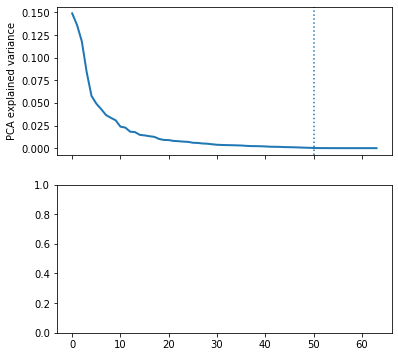

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# 定义管道以搜索PCA截断和分类器正则化的最佳组合。

logistic = SGDClassifier(loss='log', penalty='l2', early_stopping=True,
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 可以使用'__'分隔的参数名称来设置管道的参数：格式为'pipelineStepsKeyName__modleParam'
param_grid = {
    'pca__n_components': [5, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')

# 处理文本数据

In [39]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

# 从 20 个类别的数据集中选出 4 个来进行训练:
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)

In [40]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [41]:
len(twenty_train.data)
len(twenty_train.filenames)

2257

2257

In [42]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))
print(twenty_train.target_names[twenty_train.target[0]])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
comp.graphics


In [43]:
np.unique(twenty_train.target)

for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

array([0, 1, 2, 3], dtype=int64)

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# 支持单词或者连续字符的 N-gram 模型的计数
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [45]:
# 单词'algorithm'出现的频数
count_vect.vocabulary_.get(u'algorithm')

4690

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer

# tf 或 tf–idf (通过use_idf参数控制)
# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# X_train_tf.shape

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [47]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [48]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [49]:
## 构建 Pipeline（管道）

In [50]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
text_clf.fit(twenty_train.data, twenty_train.target)  

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [51]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories, 
                                 shuffle=True, 
                                 random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [52]:
# model2
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(twenty_train.data, twenty_train.target)  
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target) 

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

0.9101198402130493

In [53]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
      target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



In [54]:
metrics.confusion_matrix(twenty_test.target, predicted)

array([[256,  11,  16,  36],
       [  4, 380,   3,   2],
       [  5,  35, 353,   3],
       [  5,  11,   4, 378]], dtype=int64)

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [56]:
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]
gs_clf.best_score_    
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

'soc.religion.christian'

0.9654425759865

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [57]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
cachedir = mkdtemp(dir='./saveModel/cache/')
pipe = Pipeline(estimators, memory=cachedir)
pipe
cachedir

rmtree(cachedir)

Pipeline(memory='./saveModel/cache/tmpvv2zxb88',
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

'./saveModel/cache/tmpvv2zxb88'

In [58]:
from sklearn.datasets import load_digits
digits = load_digits()
pca1 = PCA()
svm1 = SVC(gamma='scale')
pipe = Pipeline([('reduce_dim', pca1), ('clf', svm1)])
pipe.fit(digits.data, digits.target)
# The pca instance can be inspected directly
print(pca1.components_)

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

[[-1.77484909e-19 -1.73094651e-02 -2.23428835e-01 ... -8.94184677e-02
  -3.65977111e-02 -1.14684954e-02]
 [ 3.27805401e-18 -1.01064569e-02 -4.90849204e-02 ...  1.76697117e-01
   1.94547053e-02 -6.69693895e-03]
 [-1.68358559e-18  1.83420720e-02  1.26475543e-01 ...  2.32084163e-01
   1.67026563e-01  3.48043832e-02]
 ...
 [-0.00000000e+00 -3.86207696e-16  8.80723279e-17 ... -1.07857080e-16
   1.64120983e-16 -1.39573767e-18]
 [-0.00000000e+00 -1.30940620e-16 -8.29009332e-17 ...  1.40549934e-17
  -1.06686163e-16  1.36335727e-16]
 [ 1.00000000e+00 -1.68983002e-17  5.73338351e-18 ...  8.66631300e-18
  -1.57615962e-17  4.07058917e-18]]


In [59]:
cachedir = mkdtemp()
pca2 = PCA()
svm2 = SVC(gamma='scale')
cached_pipe = Pipeline([('reduce_dim', pca2), ('clf', svm2)], memory=cachedir)
cached_pipe.fit(digits.data, digits.target)
print(cached_pipe.named_steps['reduce_dim'].components_)

# AttributeError -开启缓存会在适配前触发转换器的克隆。因此，管道的转换器实例不能被直接查看
# print(pca2.components_)

# Remove the cache directory
rmtree(cachedir)

Pipeline(memory='C:\\Users\\gjy\\AppData\\Local\\Temp\\tmp1b3awgmp',
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

[[-1.77484909e-19 -1.73094651e-02 -2.23428835e-01 ... -8.94184677e-02
  -3.65977111e-02 -1.14684954e-02]
 [ 3.27805401e-18 -1.01064569e-02 -4.90849204e-02 ...  1.76697117e-01
   1.94547053e-02 -6.69693895e-03]
 [-1.68358559e-18  1.83420720e-02  1.26475543e-01 ...  2.32084163e-01
   1.67026563e-01  3.48043832e-02]
 ...
 [-0.00000000e+00 -3.86207696e-16  8.80723279e-17 ... -1.07857080e-16
   1.64120983e-16 -1.39573767e-18]
 [-0.00000000e+00 -1.30940620e-16 -8.29009332e-17 ...  1.40549934e-17
  -1.06686163e-16  1.36335727e-16]
 [ 1.00000000e+00 -1.68983002e-17  5.73338351e-18 ...  8.66631300e-18
  -1.57615962e-17  4.07058917e-18]]


In [60]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
boston = load_boston()
X = boston.data
y = boston.target
transformer = QuantileTransformer(output_distribution='normal')
regressor = LinearRegression()
regr = TransformedTargetRegressor(regressor=regressor,
                                  transformer=transformer)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)
print('R2 score: {0:.2f}'.format(regr.score(X_test, y_test)))
raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score: {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))

D:\Software\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (379). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
                           regressor=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           transformer=QuantileTransformer(copy=True,
                                                           ignore_implicit_zeros=False,
                                                           n_quantiles=1000,
                                                           output_distribution='normal',
                                                           random_state=None,
                                                           subsample=100000))

R2 score: 0.67
R2 score: 0.64


In [61]:
transformer = QuantileTransformer(output_distribution='normal')
transformer

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='normal', random_state=None,
                    subsample=100000)

In [62]:
## FeatureUnion（特征联合）: 复合特征空间

In [63]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
estimators = [('linear_pca', PCA()), ('kernel_pca', KernelPCA())]
combined = FeatureUnion(estimators)
combined

FeatureUnion(n_jobs=None,
             transformer_list=[('linear_pca',
                                PCA(copy=True, iterated_power='auto',
                                    n_components=None, random_state=None,
                                    svd_solver='auto', tol=0.0, whiten=False)),
                               ('kernel_pca',
                                KernelPCA(alpha=1.0, coef0=1, copy_X=True,
                                          degree=3, eigen_solver='auto',
                                          fit_inverse_transform=False,
                                          gamma=None, kernel='linear',
                                          kernel_params=None, max_iter=None,
                                          n_components=None, n_jobs=None,
                                          random_state=None,
                                          remove_zero_eig=False, tol=0))],
             transformer_weights=None, verbose=False)

In [64]:
## 用于异构数据的列转换器

In [65]:
import pandas as pd
X = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3]})

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

# 使用preprocessing.OneHotEncoder将city列编码为一个分类变量 -- 处理后产生的新列以'city_category'为前缀,
# 使用feature_extraction.text.CountVectorizer来处理title列 -- 处理后产生的新列'title_bow'为前缀
# 忽略其余的ranking列(remainder='drop'):
column_trans = ColumnTransformer(
    [('city_category', CountVectorizer(analyzer=lambda x: [x]), 'city'),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='drop')
column_trans.fit(X)

column_trans.get_feature_names()


# 通过设置remainder='passthrough'来保留其余的ranking列。这些值被附加到转换的末尾
column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='passthrough')


column_trans.fit_transform(X)


NameError: name 'X' is not defined

In [4]:
from sklearn.feature_extraction import DictVectorizer

pos_window = [
    {
        'word-2': 'the',
        'pos-2': 'DT',
        'word-1': 'cat',
        'pos-1': 'NN',
        'word+1': 'on',
        'pos+1': 'PP',
    },
    # in a real application one would extract many such dictionaries
]

vec = DictVectorizer()
pos_vectorized = vec.fit_transform(pos_window)
pos_vectorized                

pos_vectorized.toarray()
vec.get_feature_names()

['pos+1=PP', 'pos-1=NN', 'pos-2=DT', 'word+1=on', 'word-1=cat', 'word-2=the']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
X                        

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [7]:
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
     ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [8]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [9]:
X.toarray()    

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [10]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                    token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (
    ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True